# Complete Financial Exploratory Data Analysis
#By- Aarush Kumar
#Dated: August 26,2021

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df_2014 = pd.read_csv('/home/aarush100616/Downloads/Projects/Financial Analysis/2014_Financial_Data.csv')
df_2015 = pd.read_csv('/home/aarush100616/Downloads/Projects/Financial Analysis/2015_Financial_Data.csv')
df_2016 = pd.read_csv('/home/aarush100616/Downloads/Projects/Financial Analysis/2016_Financial_Data.csv')
df_2017 = pd.read_csv('/home/aarush100616/Downloads/Projects/Financial Analysis/2017_Financial_Data.csv')
df_2018 = pd.read_csv('/home/aarush100616/Downloads/Projects/Financial Analysis/2018_Financial_Data.csv')

In [3]:
# Let's Check Shape of Each data set
print("Shape of data for Year 2014 is {}".format(df_2014.shape))
print("Shape of data for Year 2015 is {}".format(df_2015.shape))
print("Shape of data for Year 2016 is {}".format(df_2016.shape))
print("Shape of data for Year 2017 is {}".format(df_2017.shape))
print("Shape of data for Year 2018 is {}".format(df_2018.shape))

Shape of data for Year 2014 is (3808, 225)
Shape of data for Year 2015 is (4120, 225)
Shape of data for Year 2016 is (4797, 225)
Shape of data for Year 2017 is (4960, 225)
Shape of data for Year 2018 is (4392, 225)


In [4]:
df_2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3808 entries, 0 to 3807
Columns: 225 entries, Unnamed: 0 to Class
dtypes: float64(222), int64(1), object(2)
memory usage: 6.5+ MB


In [5]:
# Data missing information for 2014 year
data_info=pd.DataFrame(df_2014.dtypes).T.rename(index={0:'column type'})
data_info=data_info.append(pd.DataFrame(df_2014.isnull().sum()).T.rename(index={0:'null values (nb)'}))
data_info=data_info.append(pd.DataFrame(df_2014.isnull().sum()/df_2014.shape[0]*100).T.
                         rename(index={0:'null values (%)'}))
display(data_info)

Unnamed: 0  Revenue Revenue Growth Cost of Revenue  \
column type          object  float64        float64         float64   
null values (nb)          0       44            236              74   
null values (%)           0  1.15546        6.19748         1.94328   

                 Gross Profit R&D Expenses SG&A Expense Operating Expenses  \
column type           float64      float64      float64            float64   
null values (nb)           52          136           59                 63   
null values (%)       1.36555      3.57143      1.54937            1.65441   

                 Operating Income Interest Expense  ... Receivables growth  \
column type               float64          float64  ...            float64   
null values (nb)               55               63  ...                290   
null values (%)           1.44433          1.65441  ...            7.61555   

                 Inventory Growth Asset Growth Book Value per Share Growth  \
column type               float64      float64                     float64   
null values (nb)              290          290                         369   
null values (%)           7.61555      7.61555                     9.69013   

                 Debt Growth R&D Expense Growth SG&A Expenses Growth  Sector  \
column type          float64            float64              float64  object   
null values (nb)         302                247                  243       0   
null values (%)      7.93067            6.48634               6.3813       0   

                 2015 PRICE VAR [%]  Class  
column type                 float64  int64  
null values (nb)                  0      0  
null values (%)                   0      0  

[3 rows x 225 columns]

In [6]:
# Data missing information for 2015 year
data_info=pd.DataFrame(df_2015.dtypes).T.rename(index={0:'column type'})
data_info=data_info.append(pd.DataFrame(df_2015.isnull().sum()).T.rename(index={0:'null values (nb)'}))
data_info=data_info.append(pd.DataFrame(df_2015.isnull().sum()/df_2015.shape[0]*100).T.
                         rename(index={0:'null values (%)'}))
display(data_info)

Unnamed: 0  Revenue Revenue Growth Cost of Revenue  \
column type          object  float64        float64         float64   
null values (nb)          0       67            340             193   
null values (%)           0  1.62621        8.25243         4.68447   

                 Gross Profit R&D Expenses SG&A Expense Operating Expenses  \
column type           float64      float64      float64            float64   
null values (nb)           65          265          170                174   
null values (%)       1.57767      6.43204      4.12621             4.2233   

                 Operating Income Interest Expense  ... Receivables growth  \
column type               float64          float64  ...            float64   
null values (nb)               42              175  ...                368   
null values (%)           1.01942          4.24757  ...            8.93204   

                 Inventory Growth Asset Growth Book Value per Share Growth  \
column type               float64      float64                     float64   
null values (nb)              369          369                         458   
null values (%)           8.95631      8.95631                     11.1165   

                 Debt Growth R&D Expense Growth SG&A Expenses Growth  Sector  \
column type          float64            float64              float64  object   
null values (nb)         399                351                  347       0   
null values (%)      9.68447            8.51942              8.42233       0   

                 2016 PRICE VAR [%]  Class  
column type                 float64  int64  
null values (nb)                  0      0  
null values (%)                   0      0  

[3 rows x 225 columns]

### Imputation :
** Imputing the null with 0 because In our case missing values refects companies don't have value for that year

In [7]:
df_2014.fillna(0,inplace=True)
df_2015.fillna(0,inplace=True)
df_2016.fillna(0,inplace=True)
df_2017.fillna(0,inplace=True)
df_2018.fillna(0,inplace=True)

In [8]:
# Considering Procter & Gamble company only 
df_2014 = df_2014[df_2014['Unnamed: 0'] =='PG' ]
df_2015 = df_2015[df_2015['Unnamed: 0'] =='PG' ]
df_2016 = df_2016[df_2016['Unnamed: 0'] =='PG' ]
df_2017 = df_2017[df_2017['Unnamed: 0'] =='PG' ]
df_2018 = df_2018[df_2018['Unnamed: 0'] =='PG' ]

In [9]:
df = df_2014.append([df_2015,df_2016,df_2017,df_2018])
df.fillna(0,inplace=True)
df.index = [2014,2015,2016,2017,2018]

Mean of Quick Ratio for P&G last 5 year is 0.57 


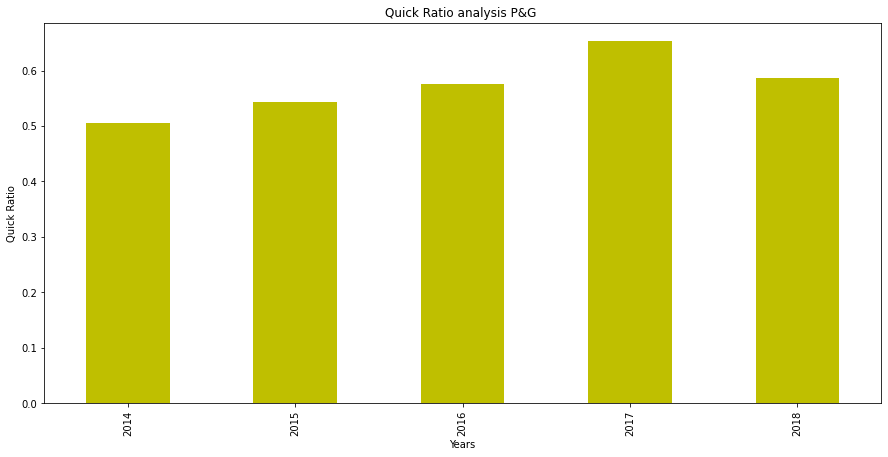

In [10]:
print("Mean of Quick Ratio for P&G last 5 year is {:.2f} ".format(df['quickRatio'].mean()))
plt.figure(figsize=(15, 7))
df['quickRatio'].plot.bar(color='y')
plt.xlabel('Years')
plt.ylabel('Quick Ratio')
plt.title('Quick Ratio analysis P&G ')
plt.grid(False)
plt.show()

Mean of Quick Ratio for P&G last 5 year is 0.95 


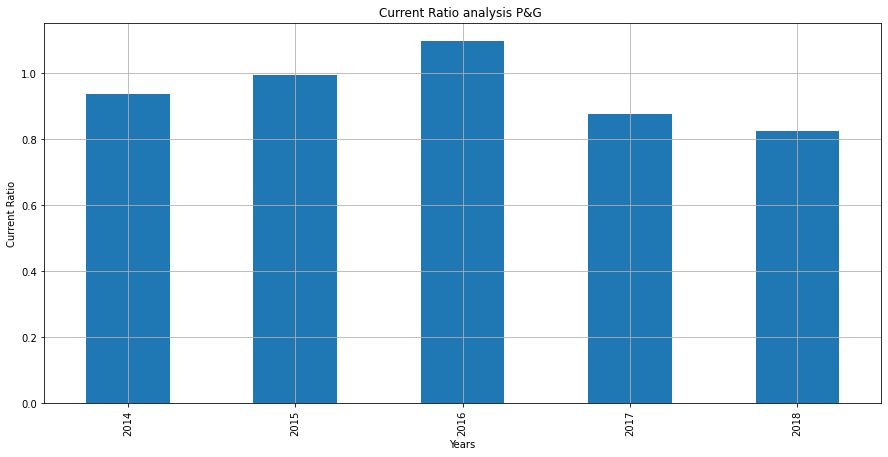

In [11]:
# Current ratio
print("Mean of Quick Ratio for P&G last 5 year is {:.2f} ".format(df['currentRatio'].mean()))
plt.figure(figsize=(15, 7))
df['currentRatio'].plot.bar()
plt.xlabel('Years')
plt.ylabel('Current Ratio')
plt.title('Current Ratio analysis P&G ')
plt.grid(True)
plt.show()

Mean of Debt to Equity  Ratio for P&G last 5 year is 0.53 


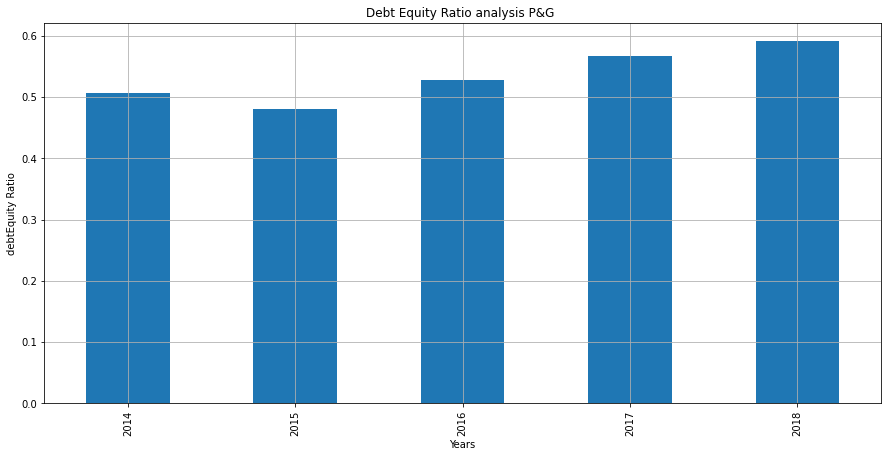

In [12]:
# Debt to Equity ratio
print("Mean of Debt to Equity  Ratio for P&G last 5 year is {:.2f} ".format(df['debtEquityRatio'].mean()))
plt.figure(figsize=(15, 7))
df['debtEquityRatio'].plot.bar()
plt.xlabel('Years')
plt.ylabel('debtEquity Ratio')
plt.title('Debt Equity Ratio analysis P&G ')
plt.grid(True)
plt.show()

Mean of Inventory Turnover for P&G last 5 year is 12.92 


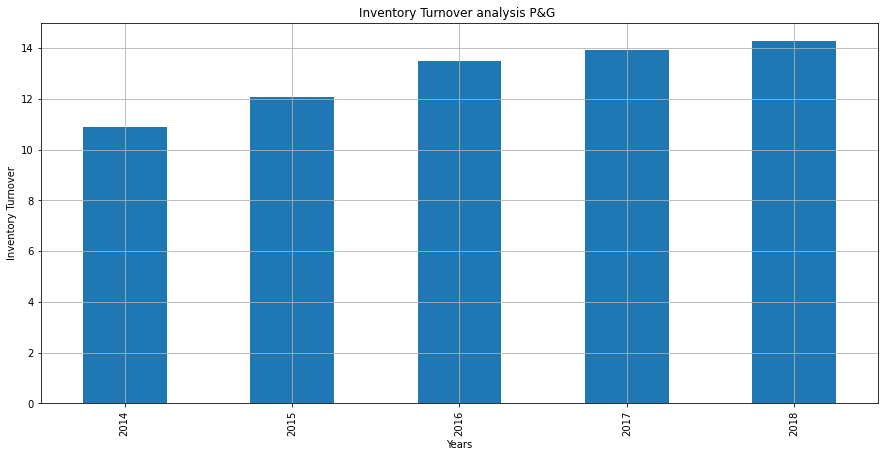

In [13]:
# Return on equity
print("Mean of Inventory Turnover for P&G last 5 year is {:.2f} ".format(df['inventoryTurnover'].mean()))
plt.figure(figsize=(15, 7))
df['inventoryTurnover'].plot.bar()
plt.xlabel('Years')
plt.ylabel('Inventory Turnover')
plt.title('Inventory Turnover analysis P&G ')
plt.grid(True)
plt.show()

In [14]:
df['ShortTermAssest'] = df['Cash and cash equivalents'] + df['Cash and short-term investments']+df['Inventories']+df['Average Receivables']\
                        + df['Investments']+df['Investment purchases and sales']+df['Short-term investments']

df['liquidcash'] = df['Cash and cash equivalents'] + df['Cash and short-term investments']

Mean of short Term assest for P&G last 5 year is 40091400000.00 


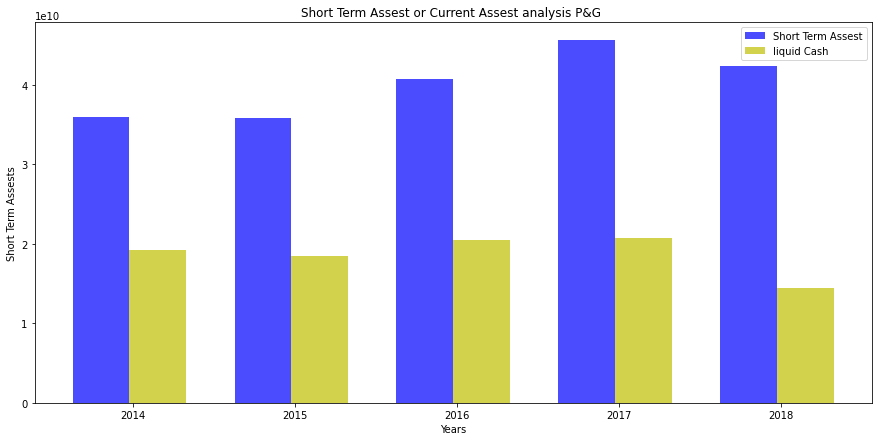

In [15]:
# Short Term Assets
n_year = 5
index = np.arange(n_year)
bar_width = 0.35
opacity = 0.7
print("Mean of short Term assest for P&G last 5 year is {:.2f} ".format(df['ShortTermAssest'].mean()))
plt.figure(figsize=(15, 7))
plt.bar(index,df['ShortTermAssest'],bar_width,alpha=opacity,color='b',label='Short Term Assest')
plt.bar(index+bar_width,df['liquidcash'],bar_width,alpha=opacity,color='y',label='liquid Cash')
plt.xlabel('Years')
plt.ylabel('Short Term Assests')
plt.title('Short Term Assest or Current Assest analysis P&G ')
plt.xticks(index+0.20, df.index)
plt.grid(False)
plt.legend()
plt.show()

Mean of Long Term assest for P&G last 5 year is 92571200000.00 
Mean Percentage Long Term asset out of Total Asset for P&G last 5 year is 72.37% 


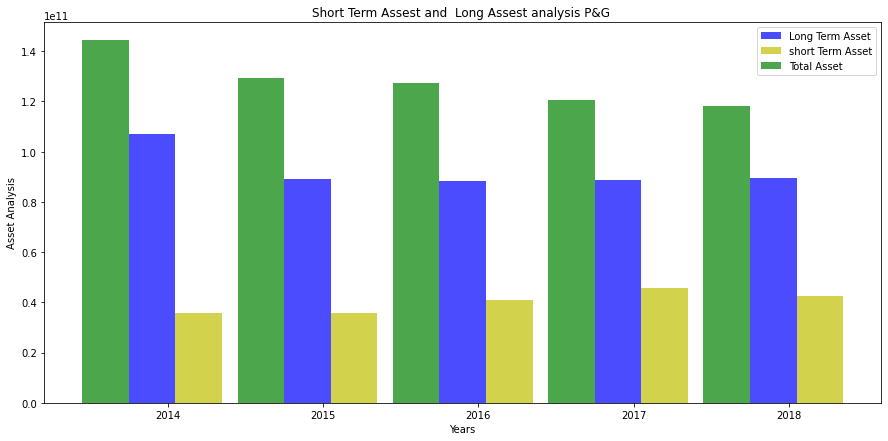

In [16]:
# Long Term Asset and Short-Term Asset
df['LongTermAsset'] = df['Property, Plant & Equipment Net'] +df['Goodwill and Intangible Assets']+df['Long-term investments']
# Long term Asset
n_year = 5
index = np.arange(n_year)
bar_width = 0.3
opacity = 0.7
print("Mean of Long Term assest for P&G last 5 year is {:.2f} ".format(df['LongTermAsset'].mean()))
print("Mean Percentage Long Term asset out of Total Asset for P&G last 5 year is {:.2f}% ".format((df['LongTermAsset'].mean()/df['Total assets'].mean())*100))
plt.figure(figsize=(15, 7))
plt.bar(index,df['LongTermAsset'],bar_width,alpha=opacity,color='b',label='Long Term Asset')
plt.bar(index+bar_width,df['ShortTermAssest'],bar_width,alpha=opacity,color='y',label='short Term Asset')
plt.bar(index-bar_width,df['Total assets'],bar_width,alpha=opacity,color='g',label='Total Asset')
plt.xlabel('Years')
plt.ylabel('Asset Analysis')
plt.title('Short Term Assest and  Long Assest analysis P&G ')
plt.xticks(index+0.10, df.index)
plt.grid(False)
plt.legend()
plt.show();